# Проект "Анализ и предсказание размеров одежды для сайта интернет-магазина"

# Общее описание задания

Суть задания - подобрать базу данных не менее 100 пунктов и обязательно на тему маркетинга и маркетплейсов
- Описать ее
- Провести базовые манипуляции с данными
- Создать новые переменные
- Определит совокупность и выборку (частные таблицы и распределения)
- Описательные статистики (меры центральной тенденции и разброса)
- Z-оценка (выбросы)
- Корреляция
- Визуализация данных
- Продвинутая визуализация даннах
- Тестирование гипотез (непараметрические критерии)
- Параметрические критерии для тестирования гипотез
- Линейная регрессия
- Логистическая регрессия


Оценивается способность ориентироваться в документации Python и дополнять работу новыми инструментами анализа данных.

Весь текст оформляется строго в ячейках типа markdown.
На каждом этапе анализа необходимо обосновывать выбор того или иного метода исследования (шага), приводить пояснение и выводить содержательный вывод методом форматирования.
Выводы подкрепляются смысловым описанием.
Аналитическая часть подкрепляется иллюстративным материалом используются варианты продвинутой визуализации + интерактивные графики.
Учитывается аккуратность кода – отсутствуют ошибки, код структурирован и оформлен в едином стиле, даются пояснения и комментарии

# Описание датасета

**URL:** https://www.kaggle.com/datasets/tourist55/clothessizeprediction?select=final_test.csv

Набор данных состоит из 4 столбцов:

Вес (в кг)  
Возраст  
Рост (в см)  
Размер

Зависимой переменной является размер, а признаками — вес, возраст и рост.

# EDA (Разведочный анализ данных)

## Импорты

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_absolute_error

## Загрузка и первичная оценка данных

In [56]:
df = pd.read_csv("final_test.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


Данные загружены, явных есть явыне пропуски, типы данных в порядке.

Очистим данные от пропусков.

In [58]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  float64
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB


## Описательная статистика признаков

In [59]:
df.describe()

,weight,age,height
count,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.807068
std,9.942877,8.148302,6.737797
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


Навеняка имеются выбросы и аномалии во всех трёх характеристиках. Более подробно изучим набор, но сначала проверим на явные дубликаты.

## Явные дубликаты

In [60]:
df.duplicated().sum()

92182

Очень много дубликатов! Но они впринципе допустимы так как с той точностью измерения вполне вероятно, что есть люди с одинаковыми четырьмя параметрами.

## Распределения и выбросы

### Вес

Построим гистрограмму, ящик с усами, и исследуем описательную статистику.

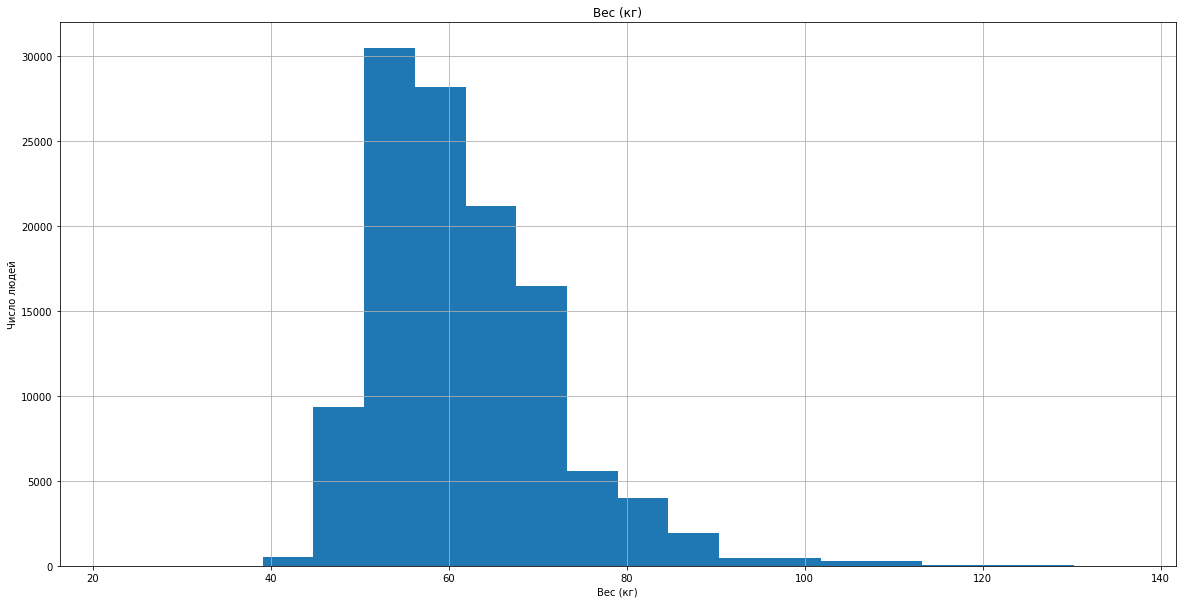

In [61]:
fig, ax = plt.subplots(1, 1,figsize=(20, 10));
ax.set_xlabel("Вес (кг)");
ax.set_ylabel("Число людей");
ax.set_title("Вес (кг)");
df.weight.hist(bins=20, ax=ax);

В основном вес распределён от 40 до 100 кг. 

In [62]:
df.weight.describe()

count    119153.000000
mean         61.756095
std           9.942877
min          22.000000
25%          55.000000
50%          61.000000
75%          67.000000
max         136.000000
Name: weight, dtype: float64

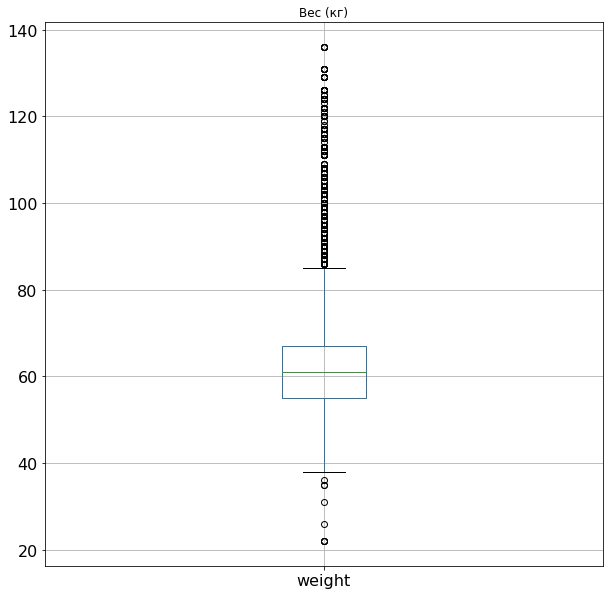

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10));
df.boxplot(fontsize=16, ax=ax, column=["weight"]);
ax.set_title('Вес (кг)');

За нижней границей явные аномалии. Анорексия либо дети либо неверные сведения. В любом случае меньше 38 модель нормально работать не будет. Обрезаем. Верхнюю границу можно не устанавливать. Рост тоже важен.

In [64]:
df = df.query("weight >= 38")

### Возраст

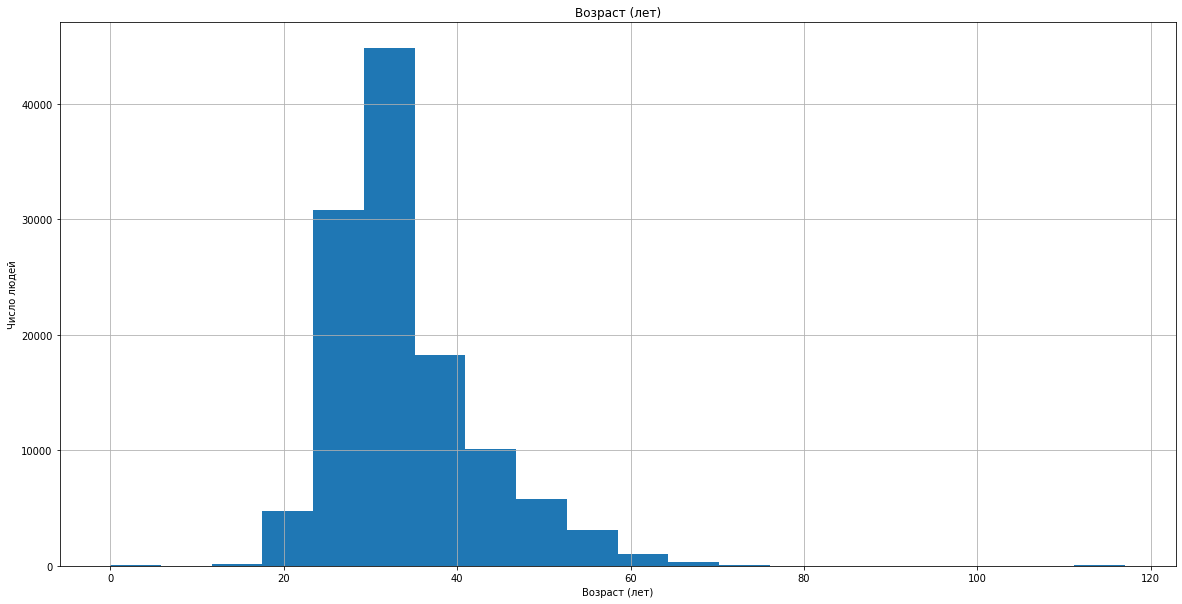

In [65]:
fig, ax = plt.subplots(1, 1,figsize=(20, 10));
ax.set_xlabel("Возраст (лет)");
ax.set_ylabel("Число людей");
ax.set_title("Возраст (лет)");
df.age.hist(bins=20, ax=ax);

Около 0 и выше 100 явно какие то аномалии. А средний у нас равен:

In [66]:
int(df.age.mean())

34

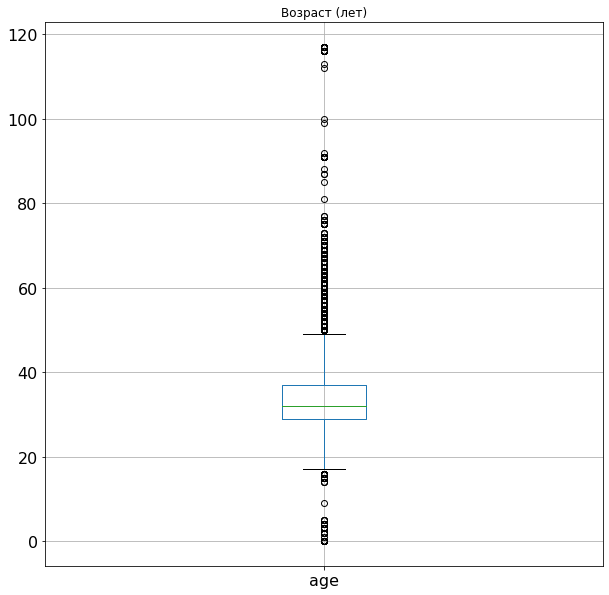

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10));
df.boxplot(fontsize=16, ax=ax, column=["age"]);
ax.set_title('Возраст (лет)');

Можно удалять данные выше 80 и меньше 16 как явные выбросы и скорее всего аномалии.

In [68]:
df = df.query("16 <= age <= 80")

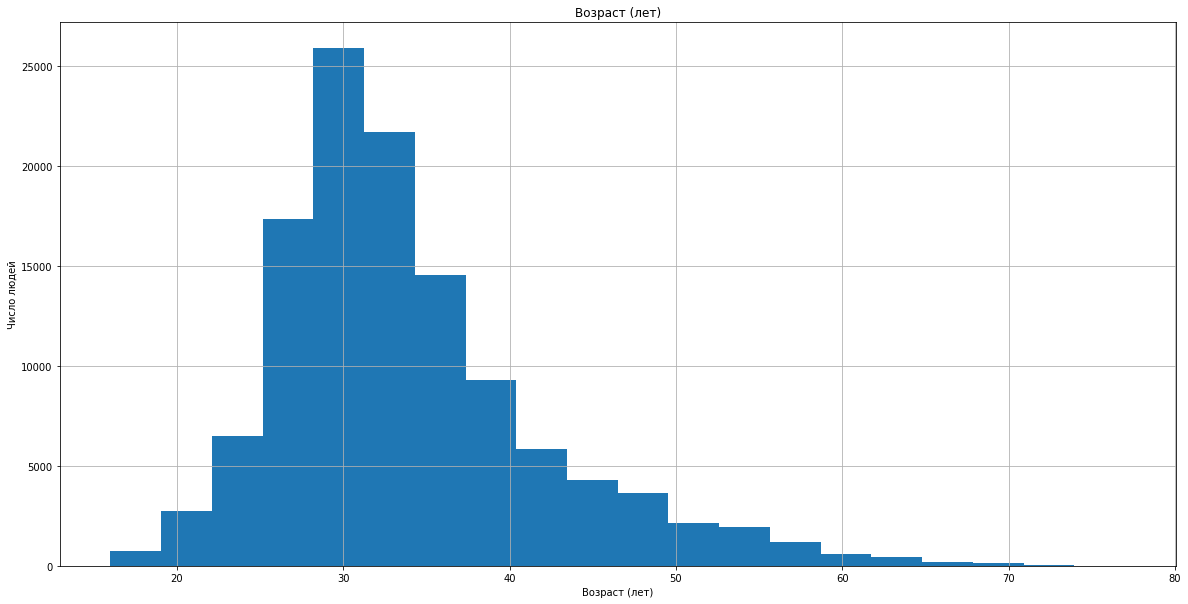

In [69]:
fig, ax = plt.subplots(1, 1,figsize=(20, 10));
ax.set_xlabel("Возраст (лет)");
ax.set_ylabel("Число людей");
ax.set_title("Возраст (лет)");
df.age.hist(bins=20, ax=ax);

In [70]:
df.age.describe()

count    119027.000000
mean         34.015316
std           7.969661
min          16.000000
25%          29.000000
50%          32.000000
75%          37.000000
max          77.000000
Name: age, dtype: float64

Исправили, но некоторая скошенность есть.

### Рост

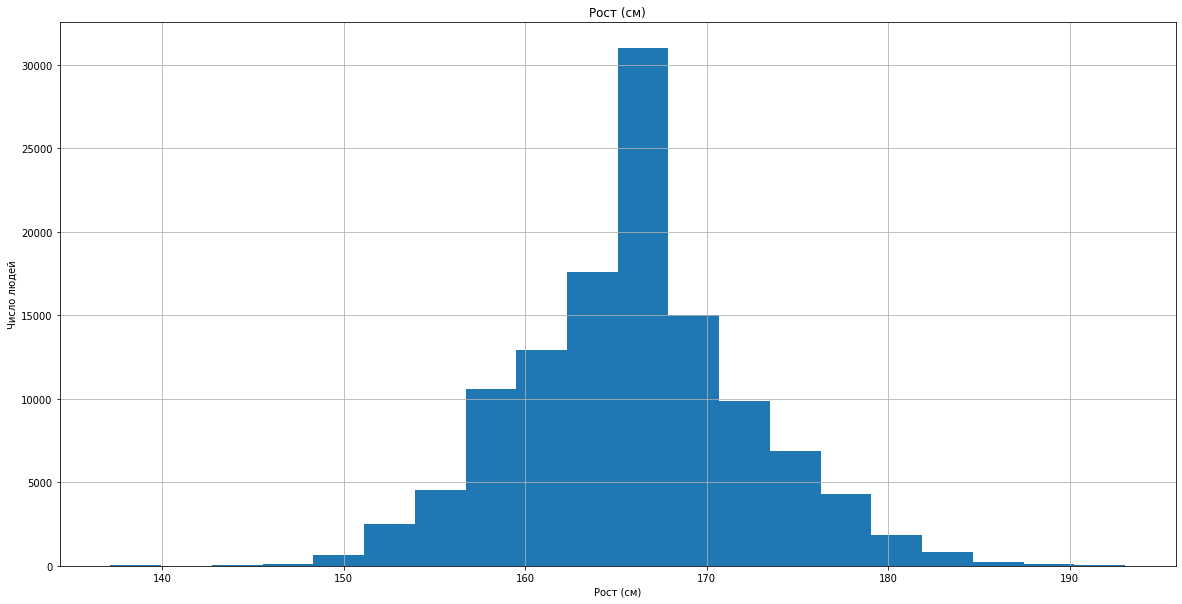

In [71]:
fig, ax = plt.subplots(1, 1,figsize=(20, 10));
ax.set_xlabel("Рост (см)");
ax.set_ylabel("Число людей");
ax.set_title("Рост (см)");
df.height.hist(bins=20, ax=ax);

Имеются выбросы как сверху, так и снизу.

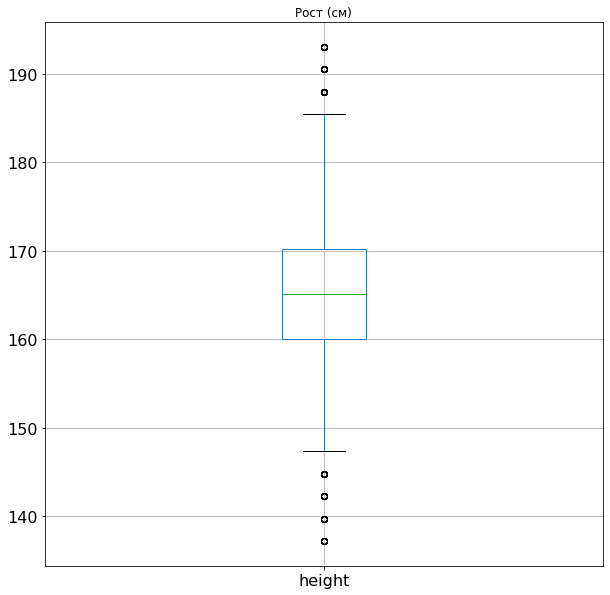

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10));
df.boxplot(fontsize=16, ax=ax, column=["height"]);
ax.set_title('Рост (см)');

In [73]:
df.sort_values(by='height').head(10)

,weight,age,height,size
31092,68,22.0,137.16,M
14833,61,29.0,137.16,M
9621,63,31.0,137.16,M
39718,54,42.0,137.16,S
92316,53,24.0,137.16,M
93312,54,42.0,137.16,S
21587,48,38.0,137.16,M
28476,65,31.0,137.16,XL
83885,58,26.0,137.16,M
105277,54,32.0,137.16,S


Впринципе нижние значения хоть и не входят в границы полутора межквартильных интервалов, вполне допустимы.

In [74]:
df.sort_values(by='height', ascending=False).head(10)

,weight,age,height,size
108521,126,27.0,193.04,XXXL
73163,95,28.0,193.04,XXXL
48480,95,28.0,193.04,XXXL
57145,89,52.0,193.04,XXXL
45403,95,28.0,193.04,XXXL
39116,95,28.0,193.04,XXXL
117420,70,29.0,193.04,M
19093,70,27.0,193.04,L
119237,79,40.0,190.50,XXXL
57742,65,33.0,190.50,L


Тоже самое.

Описательная статистика:

In [75]:
df.height.describe()

count    119027.000000
mean        165.807262
std           6.737199
min         137.160000
25%         160.020000
50%         165.100000
75%         170.180000
max         193.040000
Name: height, dtype: float64

Средний рост соответствует медианному и равен 165 см.

## Корреляции между величинами

### Корреляционная матрица

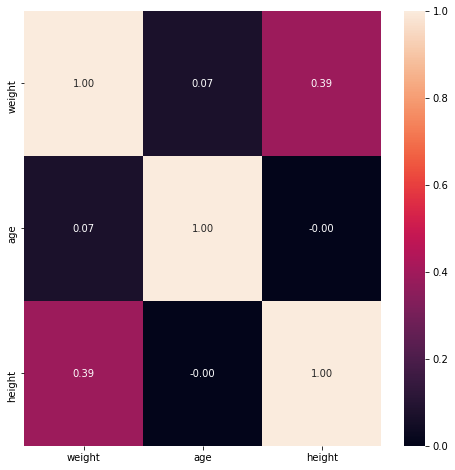

In [76]:
num_features = ['weight', 'age', "height"]
plt.figure(figsize = (8,8))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f");

Возраст значимо не коррелирует ни с одной величиной. Еле заметная корреляция наблюдается между возрастом и весом. Между ростои и весом как и ожидается имеется связь, правда слабая по шкале Чеддока.

### Матрица диаграмм рассеяния

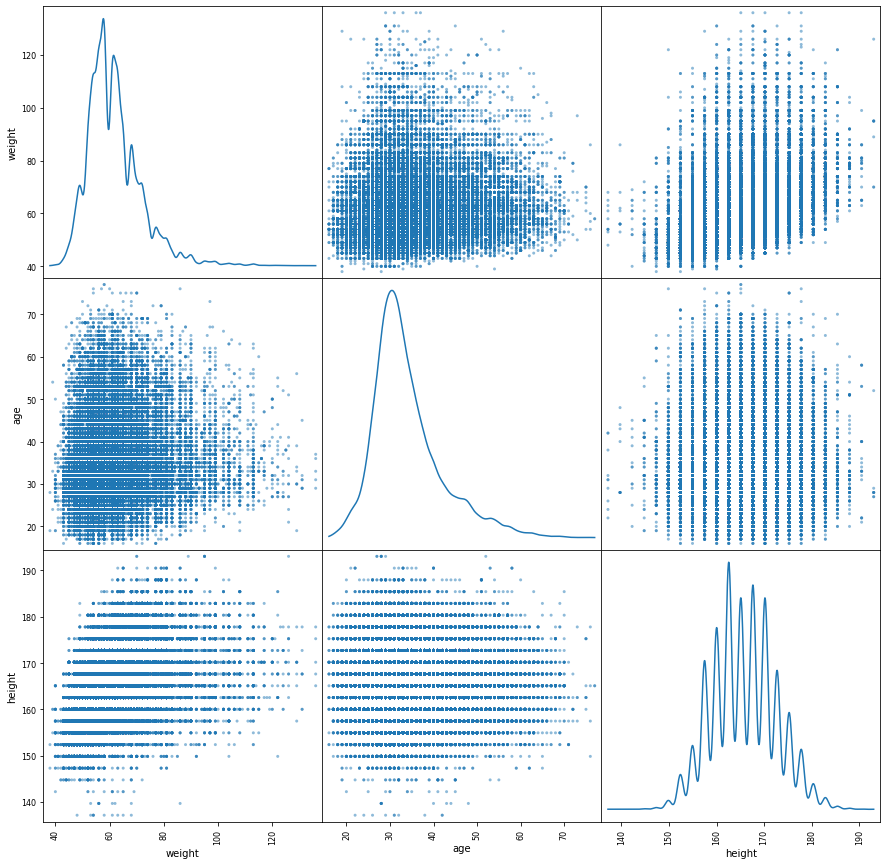

In [77]:
pd.plotting.scatter_matrix(df[num_features], diagonal="kde", figsize=(15, 15));

Так оно и есть. Кроме того заметна дискретность данных. Интересно, а если очистить от дубликатов.

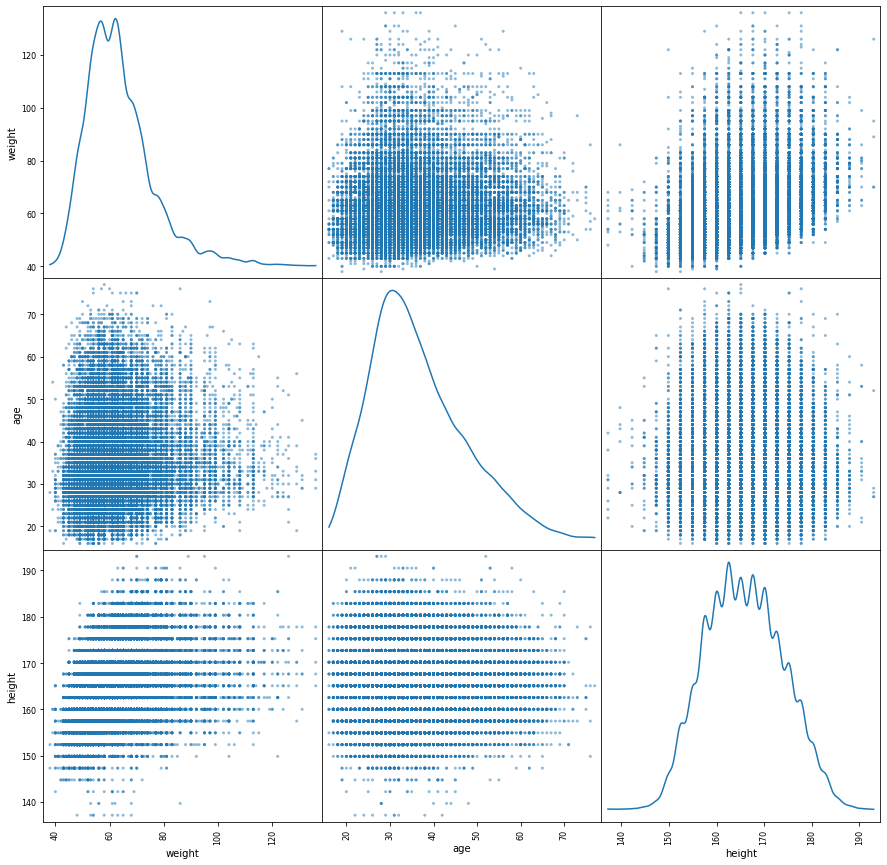

In [78]:
pd.plotting.scatter_matrix(df.drop_duplicates()[num_features], diagonal="kde", figsize=(15, 15));

Данные всё так же дискретны, но в меньшей степени.

## Анализ категориальной зависимой переменной

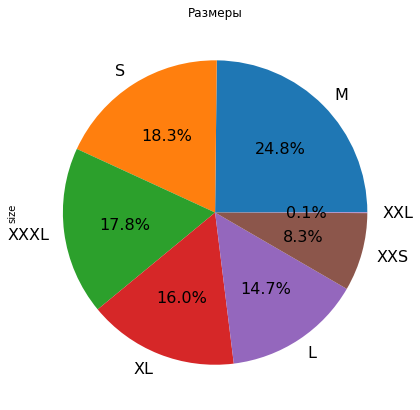

In [79]:
df["size"].value_counts().plot(kind='pie', title="Размеры", fontsize=16, legend=False, autopct='%1.1f%%', figsize=(7,7));

Середина (M) она середина даже в одежде. На втором месте (S). На третьем XL.

Имеется дисбаланс классов, что стоит учитыать при логистической регрессии.

## Проверка статистических гипотез

### Отличается ли средний возраст для двух популярных размеров

Используем параметрический t-критерий Стьюдента для средних двух незавмсимых выборок. Определим выборки.

In [80]:
df_M = df.query("size == 'M'")
df_S = df.query("size == 'S'")

**Гипотезы:**

$H_0$ - средние равны.

$H_1$ - средние не равны.

In [81]:
results = st.ttest_ind(df_M.age,
                       df_S.age,
                       equal_var = False)
results.pvalue

9.104104807466233e-39

На уровне значимости 0.05 мы отвергаем нулевую гипотезу. Средние возрасты не одинаковы.

In [82]:
print(df_M.age.mean(), df_S.age.mean())

33.43246810382754 32.58329127861632


Да имеется небольшая, но статистически значимая разница.

## Построение линейных моделей

### Линейная регрессия

Так как зависимая переменная признак категориальный, проверим удастся ли нам предсказать вес по росту и возрасту. Так как линейные модели чувствительны к шкале применим стандартизацию.

Делим датасет на зависимые и независимые переменные.

In [83]:
X = df.drop(["weight", "size"], axis=1)
y = df["weight"]

Выделим тренировочный и тестовый наборы.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

Стандартизируем признаки, так как линейные модели чувствительны к масштабу.

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим модель и проверим оценку $R^2$ на тестовом наборе.

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.15907740075320753

Оценка не очень хорошая, возможно следует попробовать другие модели. Проверим на тестовом.

In [87]:
model.score(X_test, y_test)

0.14849558452750178

Модель слишком простая. Недообучение есть. Сравним с dummy моделью.

In [88]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-5.3524248492031745e-05

Линейная модель лучше, dummy, что уже хорошо.

Расчмтаем для этих моделей метрику абсолютной ошибки.

In [89]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

6.738242492354749

Средняя ошибка пости 7 кг. Посмотрим, что у dummy.

In [90]:
y_pred = dummy.predict(X_test)
mean_absolute_error(y_test, y_pred)

7.4606746994481155

Разница чуть меньше одного кг - модель линейной регресси по-видимому не очень хорошо подходит для этой задачи предсказания.

### Логистическая регрессия

Делим на признаки и зависимую переменную.

In [91]:
X = df.drop(["size"], axis=1)
y = df["size"]

Выделяем тренировочный и тестовый набор.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

У логистической регрессии булем подбирать один гиперпараметр - С - степень регуляризации. Будем подбирать используя GridSearchCV. Так как, как и линейная регрессия, логистическая чувствительна к шкалированию, поэтому будем стандартизировать признаки, а чтобы они стандартизировались независимо при перекрёстной проверке будем использовать Pipeline. В качестве метрики из-за дисбаланса классов разумно использовать f1-меру.

In [93]:
scaler = StandardScaler()
model = LogisticRegression(random_state=1234, class_weight="balanced")
pipe = Pipeline([("scaler", scaler), ("logreg", model)])
params = {"logreg__C": np.logspace(-5, 5, 20)}
lr = GridSearchCV(pipe, params, scoring="f1_weighted", verbose=3)
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...................logreg__C=1e-05;, score=0.213 total time=   0.6s
[CV 2/5] END ...................logreg__C=1e-05;, score=0.208 total time=   0.5s
[CV 3/5] END ...................logreg__C=1e-05;, score=0.207 total time=   0.5s
[CV 4/5] END ...................logreg__C=1e-05;, score=0.209 total time=   0.5s
[CV 5/5] END ...................logreg__C=1e-05;, score=0.209 total time=   0.5s
[CV 1/5] END ...logreg__C=3.359818286283781e-05;, score=0.266 total time=   0.5s
[CV 2/5] END ...logreg__C=3.359818286283781e-05;, score=0.262 total time=   0.5s
[CV 3/5] END ...logreg__C=3.359818286283781e-05;, score=0.260 total time=   0.5s
[CV 4/5] END ...logreg__C=3.359818286283781e-05;, score=0.260 total time=   0.5s
[CV 5/5] END ...logreg__C=3.359818286283781e-05;, score=0.262 total time=   0.4s
[CV 1/5] END ..logreg__C=0.00011288378916846884;, score=0.331 total time=   0.5s
[CV 2/5] END ..logreg__C=0.00011288378916846884

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=1234))]),
             param_grid={'logreg__C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=3)

In [94]:
print(f'Лучшая модель имеет значение f1_weighted: {lr.best_score_:.3f} при C = {lr.best_params_["logreg__C"]:.3f}')

Лучшая модель имеет значение f1_weighted: 0.482 при C = 6.158


Проверим на тестовом наборе

In [95]:
lr.best_estimator_.score(X_test, y_test)

0.4616056726148469

Результат немного ниже, чем при кросс-валидации. Сравним с dummy.

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.09646231499809492

Значительно меньше, чем у модели логистической регрессии.